# SENTIMENT ANALYSIS FOR AMAZON REVIEWS

# BUSINESS PROBLEM
**Kozmos, a company focused on producing home textiles and casual wear, aims to increase its sales by analyzing customer reviews and improving product features based on complaints. In line with this goal, sentiment analysis will be applied to the reviews, and the data will be tagged. A classification model will then be built using the tagged data.**

# DATASET STORY
**The dataset consists of variables such as reviews related to a specific product group, the review title, the number of stars, and how many people found the review helpful.**

# FEATURES  
- Star: Number of stars given to the product  
- HelpFul: Number of people who found the review helpful  
- Title: Title given to the content of the review, short comment  
- Review: The review of the product

# IMPORTINGS

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

In [96]:
df = pd.read_excel("/Users/mustafaemircan/PycharmProjects/MiuulBootcamp/PROJECTS/NLP PROJECTS/amazon.xlsx")
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


In [97]:
df["HelpFul"].sort_values(ascending=False).head()

425    124
58      81
212     74
252     69
59      60
Name: HelpFul, dtype: int64

In [98]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Duplicated Values #####################")
    print(dataframe.duplicated().sum())
    print("##################### Missing Values #####################")
    print(dataframe.isnull().sum())
    print("##################### Number of Unique Values #####################")
    print(df.nunique())

check_df(df)

##################### Shape #####################
(5611, 4)
##################### Types #####################
Star        int64
HelpFul     int64
Title      object
Review     object
dtype: object
##################### Duplicated Values #####################
63
##################### Missing Values #####################
Star        0
HelpFul     0
Title      52
Review     18
dtype: int64
##################### Number of Unique Values #####################
Star          5
HelpFul      47
Title      3846
Review     5337
dtype: int64


# NORMALIZING CASE FOLDING

In [99]:
df["Review"] = df["Review"].str.lower() 

# PUNCTUATIONS

In [100]:
df["Review"] = df["Review"].str.replace('[^\w\s]', ' ', regex=True)

# NUMBERS



In [101]:
df["Review"] = df["Review"].str.replace('\d', '', regex=True)

# STOPWORDS


In [102]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
sw = stopwords.words("english")

df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

In [104]:
df["Review"].head()

0                                                happy
1     good quality material however panels mis matched
2    product fun bedroom windows br imagery bit str...
3    lo unico que gustaria es que sean un poco mas ...
4    great bang buck believe quality material vibra...
Name: Review, dtype: object

# RAREWORDS

In [105]:
temp_df = pd.Series(' '.join(df["Review"]).split()).value_counts()[-1000:]
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in temp_df))

In [106]:
df["Review"].value_counts().shape

(5088,)

# LEMMATIZATION


In [107]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mustafaemircan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [109]:
df["Review"].head()

0                                                happy
1       good quality material however panel mi matched
2    product fun bedroom window br imagery bit stre...
3    lo unico que gustaria e que sean un poco ma la...
4    great bang buck believe quality material vibra...
Name: Review, dtype: object

# TEXT VISUALIZATION

In [110]:
tf = df["Review"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns = ["words", "tf"]

In [111]:
tf.head()

,words,tf
0,happy,203.00
1,good,542.00
2,quality,904.00
3,material,584.00
4,however,83.00


In [112]:
tf.sort_values("tf", ascending=False).head()

,words,tf
65,curtain,2630.00
42,look,1548.00
118,love,1475.00
102,room,1155.00
162,like,1066.00


# BARPLOT



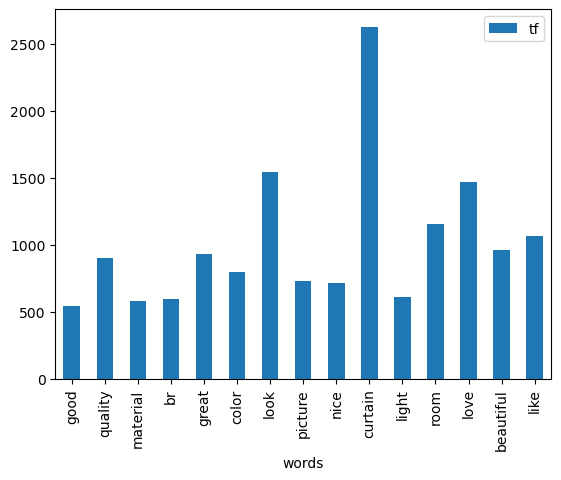

In [113]:
tf[tf["tf"] > 500].plot.bar(x="words", y="tf")
plt.show()

# WORDCLOUD



In [114]:
text = " ".join(i for i in df.Review)

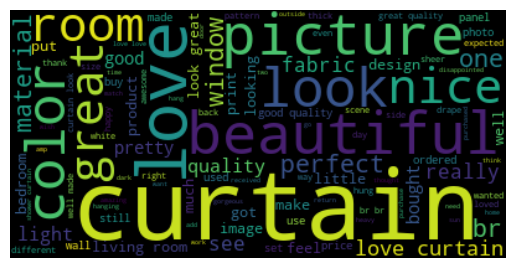

In [115]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# SENTIMENT ANALYSIS

In [116]:
sia = SentimentIntensityAnalyzer()

In [117]:
df["polarity_score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment_label"] = df["Review"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [118]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,sentiment_label
0,5,0,looks great,happy,0.57,pos
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched,0.44,pos
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...,0.85,pos
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00,neg
4,5,0,Wow great purchase,great bang buck believe quality material vibra...,0.90,pos


In [119]:
filtered_df = df[(df["Star"] > 3) & (df["polarity_score"] < 0)][["Star", "polarity_score"]]

,Star,polarity_score
3663,5,-0.03
3055,5,-0.03
3727,5,-0.03
3438,5,-0.03
1920,4,-0.03
5545,5,-0.03
5571,5,-0.05
4205,5,-0.05
539,5,-0.08
2924,4,-0.08


In [120]:
filtered_df.sort_values("polarity_score").head(10)

,Star,polarity_score
4600,5,-0.90
4767,4,-0.72
5587,5,-0.71
4766,4,-0.71
5544,4,-0.70
3057,4,-0.70
2385,5,-0.68
644,5,-0.58
5226,5,-0.57
389,4,-0.54


In [121]:
df["sentiment_label"].value_counts()

sentiment_label
pos    4831
neg     780
Name: count, dtype: int64

In [123]:
df.groupby("sentiment_label")["Star"].mean()

sentiment_label
neg   3.38
pos   4.57
Name: Star, dtype: float64

# LABEL ENCODING

In [124]:
df["sentiment_label"] = LabelEncoder().fit_transform(df["sentiment_label"])

In [125]:
df.head()

,Star,HelpFul,Title,Review,polarity_score,sentiment_label
0,5,0,looks great,happy,0.57,1
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched,0.44,1
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...,0.85,1
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...,0.00,0
4,5,0,Wow great purchase,great bang buck believe quality material vibra...,0.90,1


# TEST - TRAIN

In [128]:
train_x, test_x, train_y, test_y = train_test_split(df["Review"],
                                                     df["sentiment_label"],
                                                     random_state=42)

In [136]:
# TF-IDF Word Level

tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

# MODELLING

- LOGISTIC REGRESSION

In [137]:
log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [139]:
y_pred = log_model.predict(x_test_tf_idf_word)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.32      0.48       210
           1       0.89      1.00      0.94      1193

    accuracy                           0.90      1403
   macro avg       0.93      0.66      0.71      1403
weighted avg       0.90      0.90      0.87      1403



In [140]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.8631520081342146

In [141]:
# random example

random_review = pd.Series(df["Review"].sample(1).values)
new_review = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(new_review)

In [143]:
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  great product exact pictured happy 
 Prediction: [1]


- RF MODELLING

In [144]:
rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)

In [145]:
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.9037747839349264

# HYPERPARAMETER

In [149]:
rf_model = RandomForestClassifier()

In [150]:
rf_params = {"max_depth": [8, None],
             "max_features": [7, "auto"],
             "min_samples_split": [2, 5, 8],
             "n_estimators": [100, 200]}

In [151]:
rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(x_test_tf_idf_word, test_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [152]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 100}

In [153]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(x_test_tf_idf_word, test_y)

In [156]:
cross_val_score(rf_final, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.8973589222165735

# THANKS.